<a href="https://colab.research.google.com/github/Vinikiran006/ShellEdunet/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Mini project**

## Load **data**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


df = pd.read_csv("data_core_updated.csv")


## Seperate Values of X and Y

In [ ]:
X = df.drop("Fertilizer", axis=1)
y = df["Fertilizer"]

## Identify numerical and categorical columns

In [ ]:
num_features = ["Temperature", "Humidity", "Soil Moisture", "Nitrogen", "Potassium", "Phosphorus"]
cat_features = ["Soil Type", "Crop Type"]

## Preprocessing: scale numerical & one-hot encode categorical

In [ ]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
])

## Build pipeline with preprocessing + classifier

In [ ]:
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

## Split data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the model

In [ ]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Temperature', 'Humidity',
                                                   'Soil Moisture', 'Nitrogen',
                                                   'Potassium', 'Phosphorus']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Soil Type',
                                                   'Crop Type'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

## **Predictions**

In [ ]:
y_pred = pipeline.predict(X_test)
y_pred

array(['MOP', 'MOP', '40-20-20', ..., 'MOP', 'MOP', 'MOP'], dtype=object)

## Evaluation

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8416666666666667

Confusion Matrix:
 [[ 80   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   4  10   0   0   3]
 [  0  14   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   3   0   0   0]
 [  0   0  16   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   1   1   0   0   0]
 [  0   0   0   7   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   2   0   0   0]
 [  0   0   0   0  28   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   1   3   0   0   3]
 [  0   0   0   0   0  29   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   3   4   0   0   3]
 [  0   0   0   0   0   0   5   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   2]
 [  0   0   0   0   0   0   0  12   0   0   0   0   0   0   0   0   0   0
    0   0   0   2   0   0   2]
 [  0   0   0   0   0   0   0   0  23   0   0   0   0   0   0   0   0   0
    0   0   1  10   0   0   3]
 [  0 

## Visualize

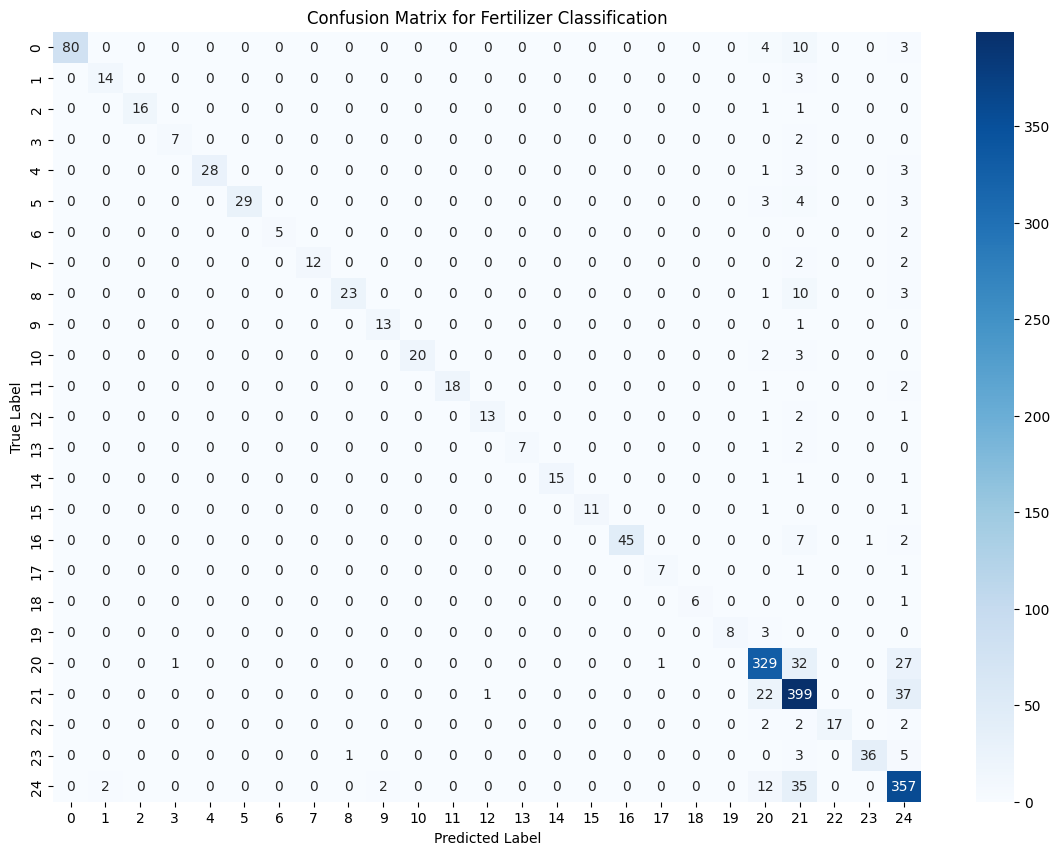

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(14,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Fertilizer Classification")
plt.show()


## Save model

In [ ]:
import joblib
joblib.dump(pipeline, "fertilizer_model.pkl")


['fertilizer_model.pkl']